In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, metrics
from sklearn.pipeline import Pipeline
%matplotlib inline

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Both feature transformation and feature learning fall under the category of <b>feature extraction</b> as they are both trying to create a new feature set from the latent structure of raw data. PCA and LDA reply on a predetermined equation and will always output the same features each and every time they are run. This is why we consider both LDA and PCA as being <b>linear transformations</b>. Feature learning algorithms attempt to solve this issue by removing that parametric assumption. They do not make any assumptions about the shape of the incoming data and rely on <b>stochastic learning</b>. Instead of throwing the same equation at the matrix of data every time, they will attempt to figure out the best features to extract by looking at the data points over and over again (in epochs) and converge onto a solution (potentially different ones at runtime).

# MNIST dataset

In [2]:
# Create numpy array from csv
images = np.genfromtxt('/home/yungshun/workspace/py3/feature-learning/datasets/mnist/mnist_train.csv', delimiter=',')

In [3]:
# 6000 images and 785 columns, 28X28 pixels + 1 response
images.shape

(60000, 785)

In [4]:
# Extract the X and y variable
images_X, images_y = images[:,1:], images[:,0]

# Values are much larger than 0-1 but scikit-learn RBM version assumes 0-1 scaling
np.min(images_X), np.max(images_X)

(0.0, 255.0)

5.0

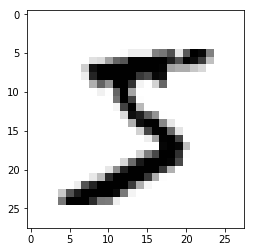

In [5]:
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

images_y[0]

## Restricted Boltzmann Machine

In PCA and LDA, we have severe limits to the number of components we are allowed to extract. For PCA, we are capped by the number of original features (we can only use less than or equal to the number of original columns), while LDA enforces the much stricter imposition that caps the number of extracted features to the number of categories in the ground truth minus one. The only restriction on the number of features RBMs are allowed to learn is that they are limited by the computation power of the computer running the network and human interpretation. RBMs can learn fewer or more features than we originally begin with. The exact number of features to learn is up to the problem and can be gridsearched.

The restriction in the RBM is that we do not allow for any intra-layer communication (only inter-layer connections). This lets nodes independently create weights and biases that end up being independent features for the data. To transform data, we simply pass it through the network and retrieve the activation variables and call those new features. This process is a type of <b>generative learning</b> that attempts to learn a probability distribution that generated the original data and exploit knowledge to give us a new feature set of our raw data.

The scikit-learn implemented version of Restricted Boltzmann Machine, <b>BernoulliRBM</b>, assumes the inputs are either binary values or values between zero and one.

1. We will scale the values of the pixels to be between zero and one
2. We will change the pixel values in place to be true if the value is over 0.5, and false otherwise

In [6]:
# Scale images_X to be beteen 0 and 1
images_X = images_X / 255.

# Make pixels binary (either white or black)
images_X = (images_X > 0.5).astype(float)

np.min(images_X), np.max(images_X)

(0.0, 1.0)

5.0

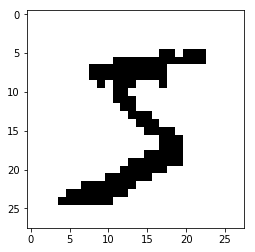

In [7]:
plt.imshow(images_X[0].reshape(28, 28), cmap=plt.cm.gray_r)

images_y[0]

In [8]:
# PCA

In [9]:
# Import Principal Components Analysis module
from sklearn.decomposition import PCA

/home/yungshun/.virtualenvs/yungshun-py3/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


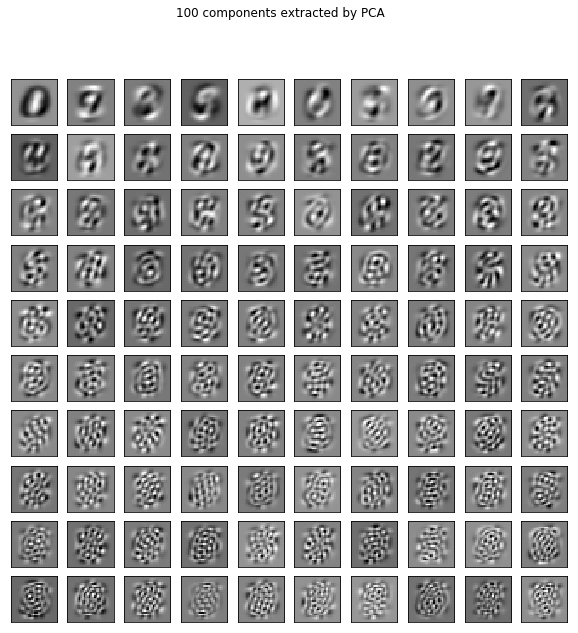

In [10]:
# Extract 100 "eigen-digits"
pca = PCA(n_components=100)
pca.fit(images_X)

# Graph the 100 components
plt.figure(figsize=(10, 10))
for i, comp in enumerate(pca.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by PCA')

plt.show()

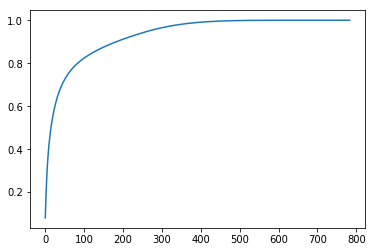

In [11]:
# Scree Plot
# Extract all "eigen-digits"
full_pca = PCA(n_components=784)
full_pca.fit(images_X)

plt.plot(np.cumsum(full_pca.explained_variance_ratio_))
# 100 components captures about 90% of the variance

In [12]:
# Use PCA to transform the first image
pca.transform(images_X[:1])

array([[ 0.52930952, -1.19850489,  0.1597815 , -2.40977034, -0.25844886,
        -1.02847511,  1.00528365,  0.59187738, -1.35877392, -0.87236182,
         0.81217501, -1.13679126, -2.36130741, -1.94149765, -1.10675217,
        -0.20185255, -0.99653942, -1.02788085,  1.4135283 ,  1.05465047,
         0.14106216,  0.23731252, -0.98497396,  0.81786774,  0.37333608,
         0.05940472, -0.96969422,  1.18305143,  0.85231197, -0.17838124,
        -0.56207015,  0.15659043,  0.3560622 , -0.15650351,  0.45055602,
         1.10199787, -0.13516461,  0.87510325,  1.1990999 , -1.55444558,
         0.26264284,  0.42312848, -0.37905573, -0.71710321,  0.30885163,
        -0.25739417,  0.70770933, -0.00734652,  0.41423209,  0.0474953 ,
        -0.28594463,  0.21060733, -0.31863559,  0.72065534, -0.01168953,
        -0.50405435, -0.60236507,  0.06808928,  0.18427842, -0.78316895,
        -0.29710985, -0.0155995 ,  0.33552944,  0.48433447,  0.42836304,
         0.54794094, -0.01224294, -0.87945251, -0.1

In [13]:
# Reminder that transformation is a matrix multiplication away
np.dot(images_X[:1]-images_X.mean(axis=0), pca.components_.T)

array([[ 0.52930952, -1.19850489,  0.1597815 , -2.40977034, -0.25844886,
        -1.02847511,  1.00528365,  0.59187738, -1.35877392, -0.87236182,
         0.81217501, -1.13679126, -2.36130741, -1.94149765, -1.10675217,
        -0.20185255, -0.99653942, -1.02788085,  1.4135283 ,  1.05465047,
         0.14106216,  0.23731252, -0.98497396,  0.81786774,  0.37333608,
         0.05940472, -0.96969422,  1.18305143,  0.85231197, -0.17838124,
        -0.56207015,  0.15659043,  0.3560622 , -0.15650351,  0.45055602,
         1.10199787, -0.13516461,  0.87510325,  1.1990999 , -1.55444558,
         0.26264284,  0.42312848, -0.37905573, -0.71710321,  0.30885163,
        -0.25739417,  0.70770933, -0.00734652,  0.41423209,  0.0474953 ,
        -0.28594463,  0.21060733, -0.31863559,  0.72065534, -0.01168953,
        -0.50405435, -0.60236507,  0.06808928,  0.18427842, -0.78316895,
        -0.29710985, -0.0155995 ,  0.33552944,  0.48433447,  0.42836304,
         0.54794094, -0.01224294, -0.87945251, -0.1

In [14]:
# RBM

In [15]:
from sklearn.neural_network import BernoulliRBM

In [16]:
# Instantiate our BernoulliRBM
# We set a random_state to initialize our weights and biases to the same starting point
# verbose is set to True to see the fitting period
# n_iter is the number of back and forth passes
# n_components (like PCA and LDA) represent the number of features to create
# n_components can be any integer, less than , equal to, or greater than the original number of features
rbm = BernoulliRBM(random_state=0, verbose=True, n_iter=20, n_components=100)

In [17]:
rbm.fit(images_X)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -115.81, time = 14.00s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -110.92, time = 15.96s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -113.51, time = 21.67s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -111.50, time = 17.41s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -116.72, time = 21.84s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -112.94, time = 19.17s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -111.57, time = 20.74s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -108.48, time = 15.67s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -108.97, time = 17.06s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -113.93, time = 16.35s
[BernoulliRBM] Iteration 11, pseudo-likelihood = -114.84, time = 15.60s
[BernoulliRBM] Iteration 12, pseudo-likelihood = -109.96, time = 15.37s
[BernoulliRBM] Iteration 13, pseudo-likelihood = -109.59, time = 15.99s
[BernoulliRBM] Iteration 14, pseudo-likelihood = -108.08, time = 16.72s
[

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=100, n_iter=20,
       random_state=0, verbose=True)

In [18]:
# RBM also has components_ attribute
len(rbm.components_)

100

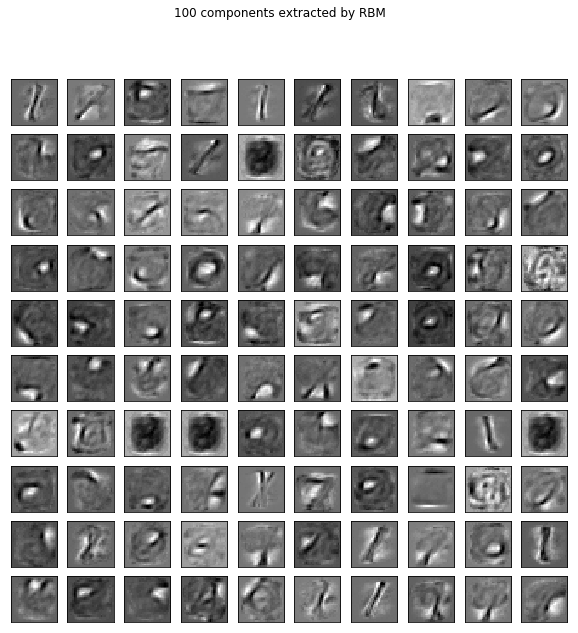

In [19]:
# Plot the RBM components (representations of the new feature sets)
plt.figure(figsize=(10, 10))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.suptitle('100 components extracted by RBM')

plt.show()

In [20]:
# It looks like many of these components are exactly the same but
# this shows that all components are actually different (albiet some very slightly) from one another
np.unique(rbm.components_.mean(axis=1)).shape

(100,)

In [21]:
# Use our Boltzman Machine to transform a single image of a 5
image_new_features = rbm.transform(images_X[:1]).reshape(100,)
image_new_features

array([4.67425882e-24, 6.80537336e-35, 1.74828387e-19, 1.57195134e-11,
       1.33505043e-26, 1.91123956e-33, 1.13500782e-22, 1.82723202e-11,
       9.99769942e-01, 1.37132497e-12, 7.58986103e-12, 1.93709385e-03,
       6.44764714e-42, 9.50642216e-32, 1.00000000e+00, 1.08657762e-03,
       1.54011517e-25, 2.48056855e-19, 9.99999960e-01, 2.23316864e-05,
       7.43858007e-11, 9.99999999e-01, 6.08527428e-13, 7.08279056e-01,
       7.08449561e-25, 1.62622878e-31, 9.99573416e-01, 9.99984767e-01,
       2.78494679e-17, 2.15881193e-09, 2.92900534e-01, 7.99107770e-17,
       4.33702854e-15, 2.12699018e-21, 9.99999976e-01, 1.77817775e-58,
       6.53514172e-20, 2.27095627e-12, 1.76728681e-15, 9.98126931e-01,
       7.95733077e-31, 3.24860655e-04, 1.21891190e-38, 2.35245364e-15,
       2.95335241e-11, 9.99029347e-01, 4.24864270e-15, 6.26715213e-14,
       1.65594065e-12, 6.86534426e-01, 2.40616147e-42, 1.01473585e-33,
       6.56882458e-26, 5.85355371e-07, 1.75431933e-31, 5.95578227e-27,
      

In [22]:
# Not the same as a simple matrix multiplication anymore
# Use neural archtecture (several matrix operations) to transform features
np.dot(images_X[:1]-images_X.mean(axis=0), rbm.components_.T)

array([[ -4.59048331, -36.39228985, -13.84416916,   0.79300505,
         -6.21402657, -22.70802177,   1.62304546, -31.47989078,
         32.75913894,  -1.87219726,   0.74963529,  20.04992029,
        -39.5427527 , -20.86103664,  -4.428176  ,  -2.46322725,
        -14.42749594,  -9.54962185,  39.53049609,   9.64919935,
         -9.91375048,  43.34162909,  -8.71879338,  16.97937066,
         -5.31016892,  -5.32171103,  16.28671888,  21.56010395,
         -5.88386102,  -8.92068334,  21.98761844, -24.38789721,
        -12.232504  ,  21.56872898,  29.23552306, -54.61568501,
         -7.64690455,   5.63341338, -18.18198447,  -0.68557211,
        -44.49136934,  19.79302232, -35.53253104,  -5.64737849,
          5.87227523,  25.71966817, -18.76359368,  -9.11972785,
         -3.21268538,  25.96610759, -61.22394186, -33.49526551,
        -19.78409873, -10.99691557, -20.790588  ,   0.16339963,
         30.61128762, -20.89283524,  37.53233957,  -8.00135705,
         22.24037287,  10.98756734,  -4.

In [23]:
# Get the most represented features
top_features = image_new_features.argsort()[-20:][::-1]

print(top_features)
image_new_features[top_features]

[56 63 69 14 66 62 21 34 18 79 58 92 27  8 26 45 39 60 23 49]


array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.99999998, 0.99999996, 0.99999993,
       0.999999  , 0.99999661, 0.99998477, 0.99976994, 0.99957342,
       0.99902935, 0.99812693, 0.93346463, 0.70827906, 0.68653443])

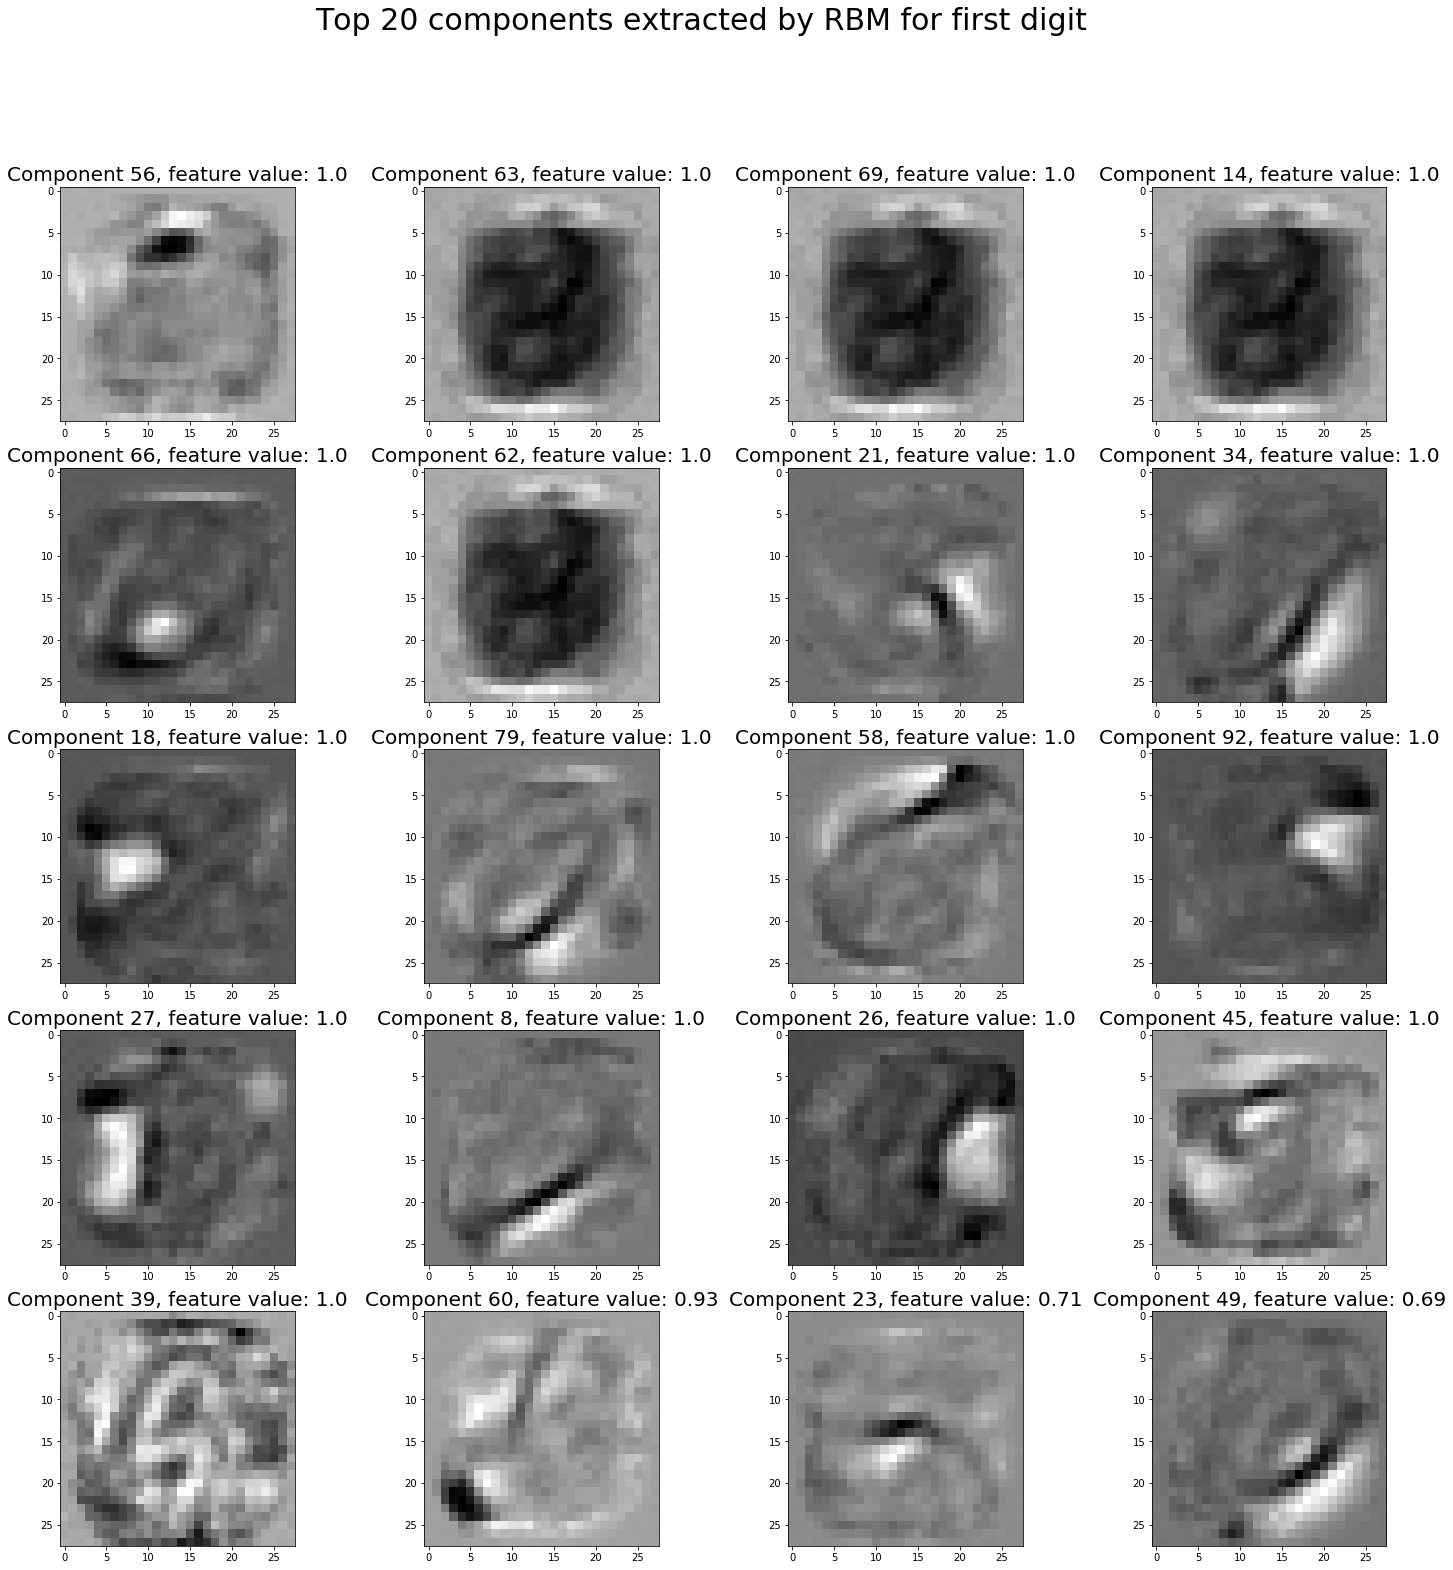

In [24]:
# Plot the RBM components (representations of the new feature sets) for the most represented features
plt.figure(figsize=(25, 25))
for i, comp in enumerate(top_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Top 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

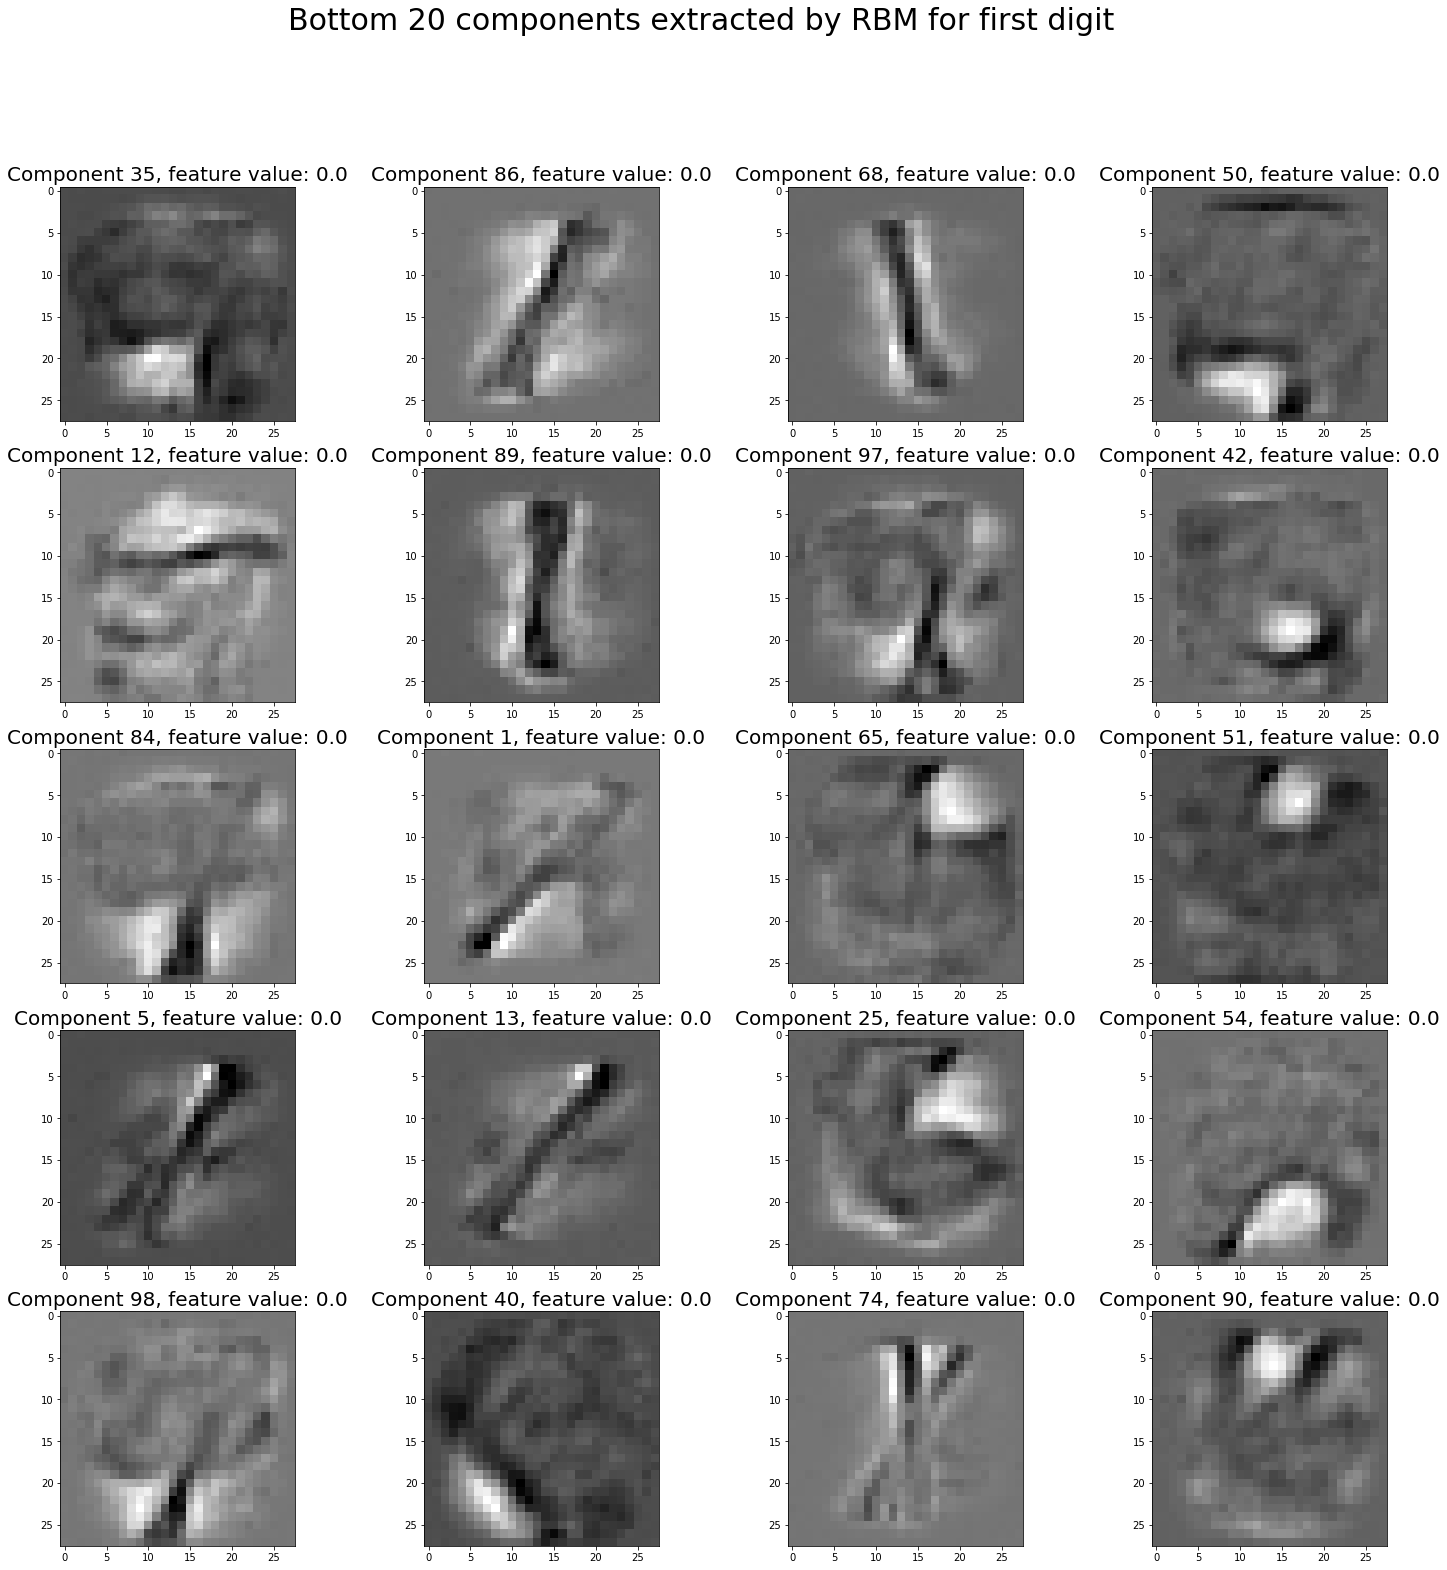

In [26]:
# Grab the least represented features
bottom_features = image_new_features.argsort()[:20]

plt.figure(figsize=(25, 25))
for i, comp in enumerate(bottom_features):
    plt.subplot(5, 4, i + 1)
    plt.imshow(rbm.components_[comp].reshape((28, 28)), cmap=plt.cm.gray_r)
    plt.title("Component {}, feature value: {}".format(comp, round(image_new_features[comp], 2)), fontsize=20)
plt.suptitle('Bottom 20 components extracted by RBM for first digit', fontsize=30)

plt.show()

## Pipelines

In [27]:
# Import logistic regression and gridsearch module for some machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [ ]:
# Pure logistic regression

In [28]:
# Create our logistic regression
lr = LogisticRegression()
params = {'C':[1e-2, 1e-1, 1e0, 1e1, 1e2]}

# Instantiate a gridsearh class
grid = GridSearchCV(lr, params)

# Fit to our data
grid.fit(images_X, images_y)

# Check the best params
grid.best_params_, grid.best_score_

({'C': 1.0}, 0.9061666666666667)

In [ ]:
# PCA + LR

In [29]:
# Use PCA to extract new features
lr = LogisticRegression()
pca = PCA()

params = {'clf__C':[1e-1, 1e0, 1e1],
         'pca__n_components': [10, 100, 200]}

# Create our pipeline
pipeline = Pipeline([('pca', pca), ('clf', lr)])

# Instantiate a gridsearh class
grid = GridSearchCV(pipeline, params)

# Fit to our data
grid.fit(images_X, images_y)

# Check the best params
grid.best_params_, grid.best_score_

({'clf__C': 10.0, 'pca__n_components': 200}, 0.90375)

In [ ]:
# RBM + LR

In [30]:
# Use the RBM to learn new features
rbm = BernoulliRBM(random_state=0)

params = {'clf__C':[1e-1, 1e0, 1e1],
          'rbm__n_components': [100, 200]
         }

# Create our pipeline
pipeline = Pipeline([('rbm', rbm), ('clf', lr)])

# Instantiate a gridsearh class
grid = GridSearchCV(pipeline, params)

# Fit to our data
grid.fit(images_X, images_y)

# Check the best params
grid.best_params_, grid.best_score_

({'clf__C': 10.0, 'rbm__n_components': 200}, 0.9369833333333333)